# Data Communications

Using Python to create signals


## Install requirements and import libraries

In [1]:
# Uncomment the line below to install the required packages
# !pip install -r requirements.txt

from numpy import arange, array, pi, sin
import matplotlib.pyplot as plt

## Sine Wave Introduction

Sine waves are the universal carrier for all information.  Data communication technologies including optical fibre, 5G, ethernet, WiFi, Bluetooth and others, carry information on sine waves.  It is therefore necessary to understand how to simulate a sine wave if we want to simulate any data communication system.  

Sine waves have 3 properties

1. Frequency
2. Phase
3. Amplitude

If we specify these properties, we can completely define the sine wave.  In general, a sine wave is described by

$$ y(t)= A * sin(2 \pi f t + \phi) $$

Where

- $y(t)$ is the value of the sine wave at time $t$
- $A$ is the amplitude of the sine wave
- $f$ is the frequency of the sine wave measured in Hertz or cycles per second
- $t$ is the time measured in seconds
- $\phi$ is the phase of the sine wave measured in radians

if no amplitude is specified, it is assumed to be 1. (If it were 0 there would be no wave!)

### Function to create a Sine Wave:

In [2]:
def create_sine_wave(time_values: array, frequency: float, phase: float = 0, amplitude: float = 1) -> array:
    """Create a sine wave based on the given parameters.
       Because time_values is an array, this operation is vectorized meaning the sin function is applied 
       to each element of the time_values array and returns an array of the y values of the sine wave.

    Args:
        time_values (array): Array of time values.
        frequency (float): Frequency of the sine wave in Hertz.
        phase (float): Phase of the sine wave in radians.
        amplitude (float): Amplitude of the sine wave. Defaults to 1.

    Returns:
        array: Array of sine wave values.
    """
    return amplitude * sin(2 * pi * frequency * time_values + phase)

def create_time_values(time_period: float = 1, sample_size: int = 1_000) -> array:
    """Create an array of time values from 0 to time_period with sample_size number of points.

    Args:
        time_period (float): Total time period in seconds.
        sample_size (int): Number of sample points.

    Returns:
        array: Array of time values.
    """
    time_step = time_period / sample_size
    return arange(0, time_period, time_step)

### Function to plot a sine wave

In [3]:
def generate_plot(time_values,
                  sine_wave_values,
                  title = "Sine Wave",
                  x_label = 'Time (seconds)',
                  y_label = 'Amplitude (Volts)'):
    """Generate a plot of a sine wave.

    Args:
        time_values (array-like): Array of time values.
        sine_wave_values (array-like): Array of sine wave values.
        title (str, optional): Title of the plot. Defaults to "Sine Wave".
        x_label (str, optional): Label for the x-axis. Defaults to 'Time (seconds)'.
        y_label (str, optional): Label for the y-axis. Defaults to 'Amplitude (Volts)'.
    """    
    plt.plot(time_values, sine_wave_values)
    plt.axhline(y=0, color='k')  # Add a black horizontal line at y=0
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True, which="both")
    plt.show()

## Sample Sine Wave Display

Build a sine wave for a `Time Period` of 1 second with the following properties:

$$ y(t)= sin(2 \pi * 8 * t + 0) $$

Where

- Frequency: $f = 8$ Hz
- Phase: $\phi = 0$ radians
- The amplitude $A = 1$ (default value)

First create a series of points in time where we will calculate the value of the sine wave with:

1. A Frequency of 8 Hz
2. A Phase of 0 radians
3. A time period of 1 second

Note:

- When using arange, we are building an array of time points from 0 to 1 second, in steps of 1 ms (millisecond). This means we will have 1,000 points in total (from 0 to 0.999 seconds). The end point (1 second) is not included in the array.
-  This is the sampling rate, i.e. how often we measure the signal (the amplitude on the y-axis) at each time point on the x-axis.
-  Smaller values for steps give a more accurate representation of the wave.

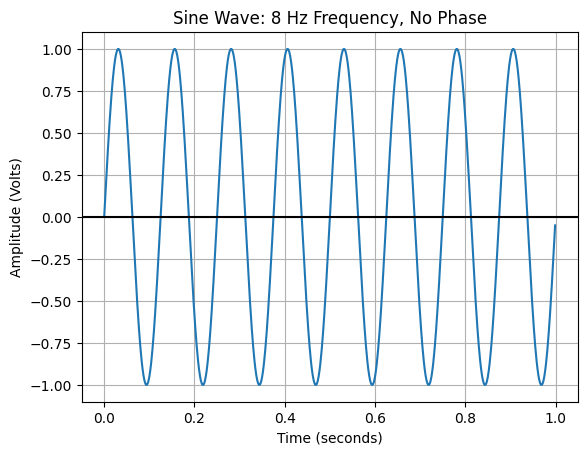

In [4]:
x_values_for_time = create_time_values(time_period=1, sample_size=1_000)  # Create a range of time sample points
y_values_for_sin_wave = create_sine_wave(time_values=x_values_for_time, frequency=8, phase=0, amplitude=1)

generate_plot(x_values_for_time, y_values_for_sin_wave, title="Sine Wave: 8 Hz Frequency, No Phase")

## Sine Wave Exercises

Now that you know how to represent a signal in Python, do the following:

### Question 1 - Plot a 4.5 Hz sine wave with a phase of 180 degrees

Parameters:

- Frequency: 4.5 Hz
- Phase: 180 degrees (convert to radians is $\pi$ radians)
- For a Time Period: 1 second
- A default Amplitude of 1
- Generate 1,000 points in total (from 0 to 0.999 seconds)

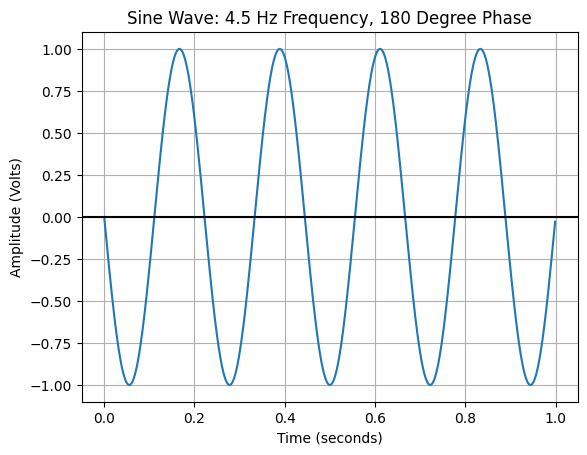

In [5]:
x_values_for_time = create_time_values(time_period=1, sample_size=1_000)
y_values_for_sin_wave = create_sine_wave(time_values=x_values_for_time, frequency=4.5, phase=pi)

generate_plot(x_values_for_time, y_values_for_sin_wave, title="Sine Wave: 4.5 Hz Frequency, 180 Degree Phase")

### Question 2 - Plot a 1kHz sine wave with an RMS amplitude of 3±V

Parameters:

- Frequency: 1 kHz (1000 Hz)
- No Phase Given therefore 0 radians
- Amplitude: RMS value of 3V means the peak amplitude $A$ is $3 * \sqrt{2} \approx 4.24$ V
- $A_{rms} = \frac{A_m}{\sqrt{2}}$ therefore $A_m = A_{rms} * \sqrt{2}$
- For a Time Period: 1 second
- Generate 1,000 points in total (from 0 to 0.999 seconds)

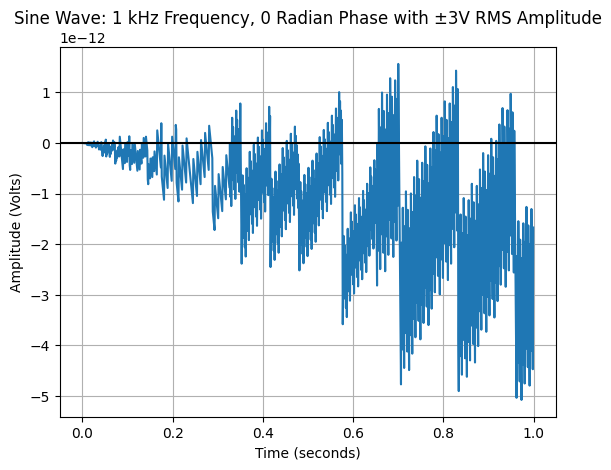

In [6]:
x_values_for_time = create_time_values()  # Using default values

rms_amplitude = 3  # RMS amplitude of 3±V
peak_amplitude = rms_amplitude * (2 ** 0.5)  # Convert RMS to peak amplitude

y_values_for_sin_wave = create_sine_wave(time_values=x_values_for_time, frequency=1_000, phase=0, amplitude=peak_amplitude)

generate_plot(x_values_for_time, y_values_for_sin_wave, title="Sine Wave: 1 kHz Frequency, 0 Radian Phase with ±3V RMS Amplitude")

### Question 3 - Plot a 1MHz signal sampled at 8MHz

Parameters:

- Frequency: 8 MHz (8,000,000 Hz)
- No Phase Given therefore 0 radians
- No Amplitude Given therefore 1 (default)
- For a Time Period: 1 second
- Generate 1,000 points in total (from 0 to 0.999 seconds)

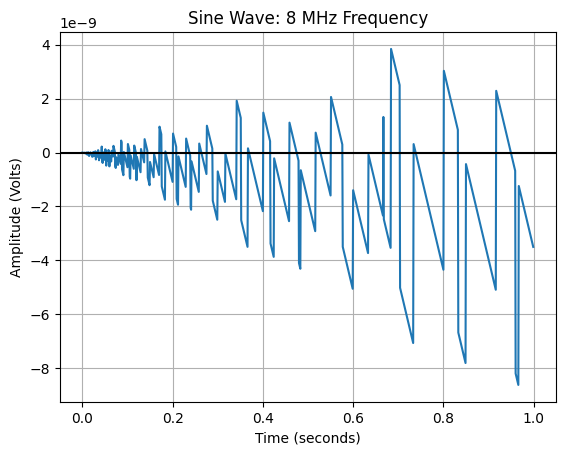

In [7]:
x_values_for_time = create_time_values()  # Using default values
sin_wave_values = create_sine_wave(time_values=x_values_for_time, frequency=8_000_000)
generate_plot(x_values_for_time, sin_wave_values, title="Sine Wave: 8 MHz Frequency")


---